## OLS (Submission 20, MAE = 14621.89)

In [52]:
#Create copy of the data to standardize.

data_s = data_num.copy()
data_pred = data_num[predictors2] #This is so we can call the columns by dtype in the next cell to divide by 2 SD
data_s.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,...,PoolQC_Gd,PoolQC_NA,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Shed,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD,BsmtSF_Qual,GarageArea_Qual,GarageArea_Cars
0,0.0,7000,5,8,90.0,3,3,3,3,1,646.0,0.0,218.0,864.0,5,864,0,0,864,1.0,0.0,1,0,3,1,3,6,0,0,1.0,336.0,3,3,0,0,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2592.0,1008.0,336.0
1,70.0,11767,5,5,0.0,2,2,2,3,2,1078.0,0.0,0.0,1078.0,3,1368,0,0,1368,1.0,0.0,1,0,3,1,3,6,0,0,1.0,195.0,3,3,0,41,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2156.0,585.0,195.0
2,75.0,9675,7,5,0.0,3,2,4,3,2,341.0,0.0,772.0,1113.0,5,1113,858,0,1971,0.0,0.0,2,1,3,1,4,8,1,4,2.0,689.0,3,3,0,48,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4452.0,2067.0,1378.0
3,24.0,2160,7,5,216.0,3,2,4,3,1,600.0,0.0,72.0,672.0,5,684,720,0,1404,1.0,0.0,2,1,3,1,4,5,0,0,2.0,462.0,3,3,20,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2688.0,1386.0,924.0
4,65.0,8850,7,6,0.0,2,2,3,3,1,0.0,0.0,815.0,815.0,5,815,875,0,1690,0.0,0.0,1,0,3,1,3,7,1,4,1.0,225.0,3,3,0,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2445.0,675.0,225.0


In [53]:
#Standardize data by subtracting predictors by respective mean and dividing by one standard deviation for dummy variables and
#2 standard deviations for numerical variables. This is so they are on roughly the same scale for using the regularization
#methods. Suggested by Marcel as something to try (not necessarily required) and also cited in various literature.

pred_float = data_pred.select_dtypes(['float64']).columns
pred_int = data_pred.select_dtypes(['int64']).columns
pred_dum = data_pred.select_dtypes(['uint8']).columns

mu_float = np.mean(data_s[pred_float])
sigma_float = np.std(data_s[pred_float])

mu_int = np.mean(data_s[pred_int])
sigma_int = np.std(data_s[pred_int])

mu_dum = np.mean(data_s[pred_dum])
sigma_dum = np.std(data_s[pred_dum])

data_s[pred_float] = (data_s[pred_float]-mu_float)/(2*sigma_float)
data_s[pred_int] = (data_s[pred_int]-mu_int)/(2*sigma_int)
data_s[pred_dum] = (data_s[pred_dum])/(sigma_dum)

data_s.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,...,PoolQC_Gd,PoolQC_NA,PoolQC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Shed,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD,BsmtSF_Qual,GarageArea_Qual,GarageArea_Cars
0,0.0,-0.194847,-0.375442,8,-0.023017,0.648051,3,-0.243117,3,-0.282776,0.264070,0.0,218.0,-0.193161,0.472998,864,0,0,-0.643664,1.0,0.0,-0.479465,-0.376436,0.107764,1,-0.352747,6,0,-0.492284,-0.504071,-0.314641,0.130096,3,-0.368546,-0.355797,...,0,1,0,0,1,0,0,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.287340,1008.0,-0.443590
1,70.0,0.119068,-0.375442,5,-0.281024,-0.304895,2,-0.823250,3,0.198789,0.792095,0.0,0.0,0.081673,-0.580017,1368,0,0,-0.096484,1.0,0.0,-0.479465,-0.376436,0.107764,1,-0.352747,6,0,-0.492284,-0.504071,-0.673234,0.130096,3,-0.368546,-0.020501,...,0,1,0,0,0,0,0,2.496483,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.405549,585.0,-0.551581
2,75.0,-0.018694,0.394770,5,-0.281024,0.648051,2,0.337016,3,0.198789,-0.108726,0.0,772.0,0.126623,0.472998,1113,858,0,0.558179,0.0,0.0,0.457137,0.630340,0.107764,1,0.459794,8,1,0.629519,0.194615,0.583114,0.130096,3,-0.368546,0.036744,...,0,1,0,0,0,0,0,2.496483,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.216947,2067.0,0.354475
3,24.0,-0.513568,0.394770,5,0.338194,0.648051,2,0.337016,3,-0.282776,0.207845,0.0,72.0,-0.439742,0.472998,684,720,0,-0.057399,1.0,0.0,0.457137,0.630340,0.107764,1,0.459794,5,0,-0.492284,0.194615,0.005804,0.130096,3,-0.290965,-0.355797,...,0,1,0,0,0,0,0,2.496483,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.261312,1386.0,0.006758
4,65.0,-0.073021,0.394770,6,-0.281024,-0.304895,2,-0.243117,3,-0.282776,-0.525524,0.0,815.0,-0.256091,0.472998,815,875,0,0.253104,0.0,0.0,-0.479465,-0.376436,0.107764,1,-0.352747,7,1,0.629519,-0.504071,-0.596937,0.130096,3,-0.368546,-0.355797,...,0,1,0,0,0,0,0,2.496483,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,-0.327195,675.0,-0.528604


In [54]:
#Fit OLS model on 25 predictors and calculate cross validation score on LogSalePrice.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

def ols_reg_10_folds(predictors, response):
    ols = LinearRegression()
    scores = cross_val_score(ols, data_s[predictors], data_s[response], cv=10, scoring = 'neg_mean_absolute_error')
    cv_mae = np.mean(-1*scores)
    return cv_mae

ols = LinearRegression()
ols.fit(data_s[predictors1],data_s['LogSalePrice'])

ols_reg_10_folds(predictors1,'LogSalePrice')

0.089004923710509845

In [55]:
#Display OLS coefficients.

pd.set_option('display.max_columns',30)
pd.DataFrame(ols.coef_.round(5), index = predictors1).T

,OverallQual,BsmtSF_Qual,GrLivArea,GarageCars,GarageArea_Cars,GarageArea,ExterQual,BsmtQual,TotalBsmtSF,KitchenQual,AgeHouse,FullBath,FireplaceQu,Foundation_PConc,Neighborhood_St_No_NHt,HeatingQC,GarageType_Attchd,GarageFinish_Unf,BsmtFinType1_GLQ,BsmtFinSF1,AgeGarage,Neighborhood_Old_Ed_SW_Brk,MSSubClass_60,MasVnrArea,CentralAir_Y
0,0.18311,0.06942,0.25074,0.07206,-0.03977,0.07552,0.00306,0.004,0.03575,0.03371,-0.07038,-0.02256,0.04625,-0.00271,0.0008,0.05722,0.00951,-0.00278,-0.00313,0.09817,0.0176,-0.02654,0.0054,-0.00278,0.02004


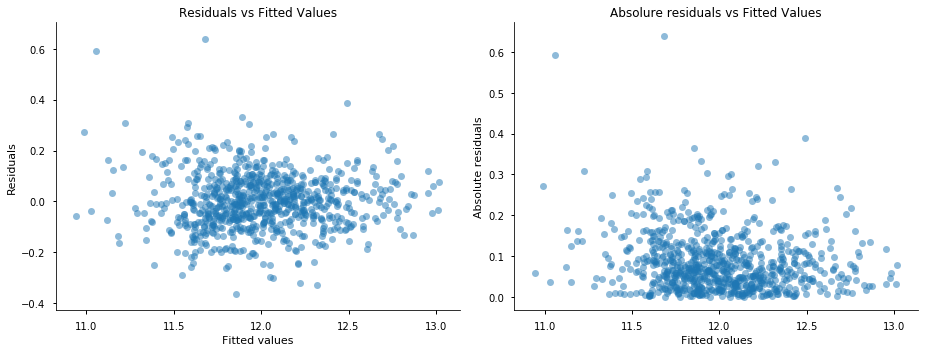

In [56]:
#Residual plots of OLS.

ols.fit(data_s[predictors1], data_s['LogSalePrice'])
y_fit = ols.predict(data_s[predictors1])
y_actual = data_s['LogSalePrice']
residuals = y_fit-y_actual
abs_residuals = abs(residuals)

fig, ax= plt.subplots(1,2, figsize=(13,5))
sns.regplot(y_fit, residuals, fit_reg=False, ax=ax[0], scatter_kws={'alpha':0.5})
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')
ax[0].set(title='Residuals vs Fitted Values')
sns.regplot(y_fit, abs_residuals, fit_reg=False, ax=ax[1], scatter_kws={'alpha':0.5, 'color': sns.color_palette()[0]})
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Absolute residuals')
ax[1].set(title='Absolure residuals vs Fitted Values')
sns.despine()
plt.tight_layout()
plt.show()
fig.savefig('residuals_OLS.png')

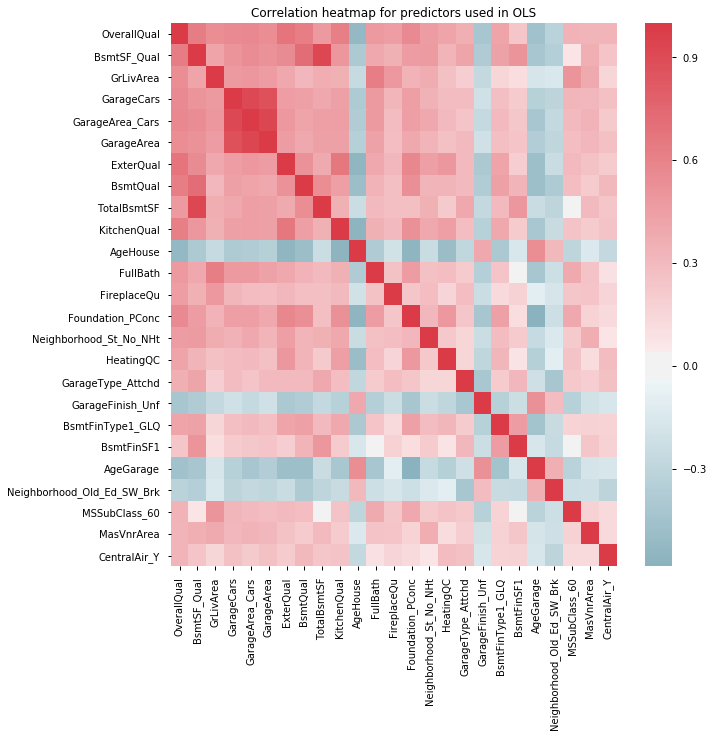

In [57]:
#Heatmap to check for perfect multicollinearity. ALready done in previous steps when creating heatmaps, but checking again. 

data_s[predictors1].corr().round(4)
fig, ax = plt.subplots(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(data_s[predictors1].corr(), ax=ax, cmap=cmap,center=0)
ax.set(title='Correlation heatmap for predictors used in OLS')
fig.savefig('correlation_OLS.png')

## Lasso, Ridge, and Elastic Net

#### LASSO (Submission 21, MAE = 13277.61)

In [58]:
#Linear Regression fit to compare to Lasso, Ridge, and ENet coefficents.

from sklearn.linear_model import LinearRegression
ols2 = LinearRegression()
ols2.fit(data_s[predictors2],data_s['LogSalePrice'])

#Lasso CV to select shrinkage ad fit Lasso on 51 variables.

from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(data_s[predictors2], np.ravel(data_s['LogSalePrice']))

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [59]:
#Ratio of Lasso coefficients to OLS coefficients

round(np.linalg.norm(lasso.coef_, ord=1)/np.linalg.norm(np.ravel(ols2.coef_), ord=1),10)

0.58027191990000004

In [60]:
#Display Lasso coefficients.

pd.set_option('display.max_columns',51)
pd.DataFrame(lasso.coef_.round(5), index = predictors2).T

,OverallQual,BsmtSF_Qual,GrLivArea,GarageCars,GarageArea_Cars,GarageArea,ExterQual,BsmtQual,TotalBsmtSF,KitchenQual,AgeHouse,FullBath,FireplaceQu,Foundation_PConc,Neighborhood_St_No_NHt,HeatingQC,GarageType_Attchd,GarageFinish_Unf,BsmtFinType1_GLQ,BsmtFinSF1,AgeGarage,Neighborhood_Old_Ed_SW_Brk,MSSubClass_60,MasVnrArea,CentralAir_Y,PavedDrive_Y,Exterior1st_VinylSd,Exterior2nd_VinylSd,GarageQual,BsmtExposure,MSZoning_RM,WoodDeckSF,GarageFinish_Fin,LotShape_Reg,MasVnrType_None,HalfBath,MSSubClass_30,OpenPorchSF,Electrical_SBrkr,GarageFinish_RFn,LotArea,Foundation_BrkTil,Neighborhood_Gr_CC_So_Ti,Neighborhood_Sa_NA_Bl_NP,BsmtFinType1_NA,BsmtFinType2_NA,MasVnrType_Stone,Neighborhood_Gi_NWA_Cr_Co,Neighborhood_BrD_IDO,BedroomAbvGr,Fence_NA
0,0.16589,0.0651,0.23089,0.0458,0.0,0.03525,0.0,0.0,0.00986,0.03558,-0.04396,-0.0,0.03059,0.0,0.01431,0.03064,0.00717,-0.0,0.0,0.06962,0.0,-0.0074,0.0,0.0,0.02214,0.01398,0.0,0.0025,0.00217,0.02277,-0.02254,0.0,0.00299,-0.00938,-0.0,0.0,-0.00773,0.00069,0.00224,0.0,0.03032,-0.0,0.01596,-0.00247,-0.00468,-0.0,0.0,0.0106,-0.00553,-0.0,-0.0


In [61]:
#Calculate Lasso MAE CV Score on LogSalePrice

scores_lasso = cross_val_score(lasso, data_s[predictors2], np.ravel(data_s['LogSalePrice']), 
                               cv=10, scoring = 'neg_mean_absolute_error')
cv_mae_lasso = np.mean(-1*scores_lasso)
cv_mae_lasso

0.082684526458542212

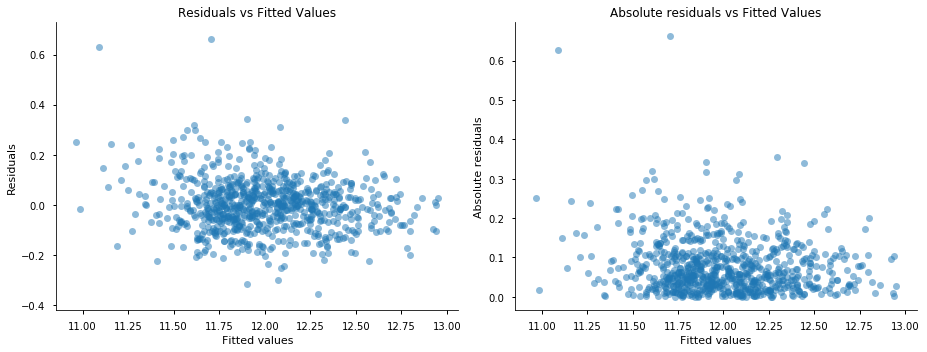

In [62]:
#Residual plots of Lasso

lasso.fit(data_s[predictors2], data_s['LogSalePrice'])
y_fit = lasso.predict(data_s[predictors2])
y_actual = data_s['LogSalePrice']
residuals = y_fit - y_actual
abs_residuals = abs(residuals)

fig, ax= plt.subplots(1,2, figsize=(13,5))
sns.regplot(y_fit, residuals, fit_reg=False, ax=ax[0], scatter_kws={'alpha':0.5})
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')
ax[0].set(title='Residuals vs Fitted Values')
sns.regplot(y_fit, abs_residuals, fit_reg=False, ax=ax[1], scatter_kws={'alpha':0.5, 'color': sns.color_palette()[0]})
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Absolute residuals')
ax[1].set(title='Absolute residuals vs Fitted Values')
sns.despine()
plt.tight_layout()
plt.show()
fig.savefig('residuals_lasso.png')

#### Fwd + Ridge (Submission 18, MAE = 13225.03)

In [63]:
#Define function and class for forward selection algorithm taken from Marcel's QBUS2820 file and edited for MAE.

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

def forwardselection(X, y):
    """Forward variable selection based on the Scikit learn API
    
    
    Output:
    ----------------------------------------------------------------------------------
    Scikit learn OLS regression object for the best model
    """

    # Functions
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score

    # Initialisation
    base = []
    p = X.shape[1]
    candidates = list(np.arange(p))

    # Forward recursion
    i=1
    bestcvscore=-np.inf    
    while i<=p:
        bestscore = 0
        for variable in candidates:
            ols = LinearRegression()
            ols.fit(X.iloc[:, base + [variable]], y)
            score = ols.score(X.iloc[:, base + [variable]], y)
            if score > bestscore:
                bestscore = score 
                best = ols
                newvariable=variable
        base.append(newvariable)
        candidates.remove(newvariable)
        
        cvscore = cross_val_score(best, X.iloc[:, base], y, scoring='neg_mean_absolute_error').mean() 
        
        if cvscore > bestcvscore:
            bestcvscore=cvscore
            bestcv = best
            subset = base[:]
        i+=1
    
    #Finalise
    return bestcv, subset

class forward:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.ols, self.subset = forwardselection(X, y)

    def predict(self, X):
        return self.ols.predict(X.iloc[:, self.subset])

    def cv_score(self, X, y, cv=10):
        from sklearn.model_selection import cross_val_score
        scores = cross_val_score(self.ols, X.iloc[:, self.subset], np.ravel(y), cv=cv, scoring='neg_mean_absolute_error')
        return -1*np.mean(scores)

In [64]:
#Fit forward selection on 51 predicotrs and print index of chosen predictors.

fwd = forward()
fwd.fit(data_s[predictors2], data_s['LogSalePrice'])
forwardselection(data_s[predictors2],data_s['LogSalePrice'])

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 [0,
  2,
  1,
  19,
  10,
  3,
  30,
  24,
  40,
  15,
  12,
  29,
  25,
  9,
  11,
  42,
  47,
  14,
  36,
  20,
  5])

In [65]:
#Copy and paste index from above output and run through loop to extract predictor names.
#Name chosen list of predictors to be predictors_fw

fwd_predictors_index = [0,2,1,19,10,3,30,24,40,15,12,29,25,9,11,42,47,14,36,20,5]
 
predictors_fw = []
for i in fwd_predictors_index:
    predictors_fw.append(predictors2[i])
print(predictors_fw)

['OverallQual', 'GrLivArea', 'BsmtSF_Qual', 'BsmtFinSF1', 'AgeHouse', 'GarageCars', 'MSZoning_RM', 'CentralAir_Y', 'LotArea', 'HeatingQC', 'FireplaceQu', 'BsmtExposure', 'PavedDrive_Y', 'KitchenQual', 'FullBath', 'Neighborhood_Gr_CC_So_Ti', 'Neighborhood_Gi_NWA_Cr_Co', 'Neighborhood_St_No_NHt', 'MSSubClass_30', 'AgeGarage', 'GarageArea']


In [66]:
#Ridge CV to select shrinkage.

from sklearn.linear_model import RidgeCV
alphas = np.exp(np.linspace(-10,20,500)) 
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(data_s[predictors_fw], np.ravel(data_s['LogSalePrice']))

RidgeCV(alphas=array([  4.53999e-05,   4.82131e-05, ...,   4.56856e+08,   4.85165e+08]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [67]:
#Ratio of Ridge to OLS coefficients of forward selected predictors.

from sklearn.linear_model import LinearRegression
ols3 = LinearRegression()
ols3.fit(data_s[predictors_fw],data_s['LogSalePrice'])
print(round(np.linalg.norm(ridge.coef_)/np.linalg.norm(np.ravel(ols3.coef_)), 3))

0.917


In [68]:
#Fit Ridge on forward selected predictors.

from sklearn.linear_model import Ridge
ridge_fw = Ridge(alpha=ridge.alpha_)
ridge_fw.fit(data_s[predictors_fw], np.ravel(data_s['LogSalePrice']))

Ridge(alpha=13.808032678892813, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [69]:
#Display ridge coefficients

pd.set_option('display.max_columns',50)
pd.DataFrame(ridge_fw.coef_.round(5), index = predictors_fw).T

,OverallQual,GrLivArea,BsmtSF_Qual,BsmtFinSF1,AgeHouse,GarageCars,MSZoning_RM,CentralAir_Y,LotArea,HeatingQC,FireplaceQu,BsmtExposure,PavedDrive_Y,KitchenQual,FullBath,Neighborhood_Gr_CC_So_Ti,Neighborhood_Gi_NWA_Cr_Co,Neighborhood_St_No_NHt,MSSubClass_30,AgeGarage,GarageArea
0,0.15172,0.21544,0.08486,0.07689,-0.06411,0.05391,-0.0276,0.0227,0.04431,0.04468,0.04548,0.03468,0.01547,0.04334,-0.0114,0.02366,0.02309,0.02158,-0.01627,0.02636,0.04658


In [70]:
#Calculate Ridge MAE CV on LogSalePrice

scores_ridge = cross_val_score(ridge_fw, data_s[predictors_fw], np.ravel(data_s['LogSalePrice']), 
                               cv=10, scoring = 'neg_mean_absolute_error')
cv_mae_ridge = np.mean(-1*scores_ridge)
cv_mae_ridge

0.08068324085571893

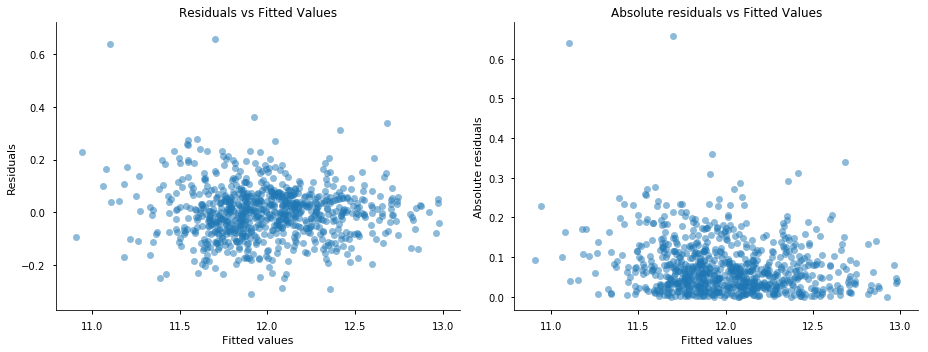

In [71]:
#Residual plot of Ridge with forward selection

ridge_fw.fit(data_s[predictors2], data_s['LogSalePrice'])
y_fit = ridge_fw.predict(data_s[predictors2])
y_actual = data_s['LogSalePrice']
residuals = y_fit-y_actual
abs_residuals = abs(residuals)

fig, ax= plt.subplots(1,2, figsize=(13,5))
sns.regplot(y_fit, residuals, fit_reg=False, ax=ax[0], scatter_kws={'alpha':0.5})
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')
ax[0].set(title='Residuals vs Fitted Values')
sns.regplot(y_fit, abs_residuals, fit_reg=False, ax=ax[1], scatter_kws={'alpha':0.5, 'color': sns.color_palette()[0]})
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Absolute residuals')
ax[1].set(title='Absolute residuals vs Fitted Values')
sns.despine()
plt.tight_layout()
plt.show()
fig.savefig('residuals_ridge_with_fwd.png')

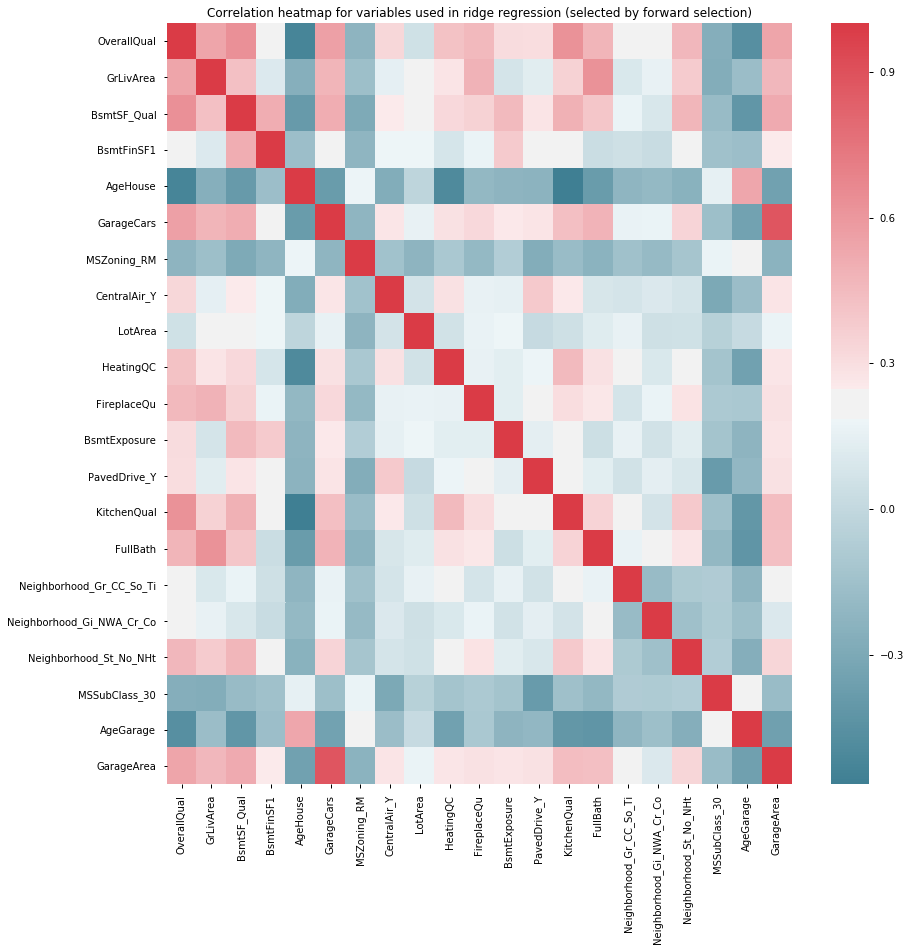

In [72]:
#Correlation heatmap on forward selected predictors to see relationships and check for perfect multicollinearity.

data_num[predictors_fw].corr().round(4)
fig, ax = plt.subplots(figsize = (14,14))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(data_num[predictors_fw].corr(), ax=ax, cmap=cmap)
ax.set(title='Correlation heatmap for variables used in ridge regression (selected by forward selection)')
fig.savefig('Correlation heatmap ridge.png')

#### ElasticNet (Submission 19, MAE = 13280.37)

In [73]:
#Select ENet shrinkage

from sklearn.linear_model import ElasticNetCV
enet = ElasticNetCV(l1_ratio=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99], cv=5)
enet.fit(data_s[predictors2],np.ravel(data_s['LogSalePrice']))

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [74]:
#Fit ENet model on 51 predictors

from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=enet.alpha_, l1_ratio=enet.l1_ratio_)
enet.fit(data_s[predictors2],np.ravel(data_s['LogSalePrice']))

ElasticNet(alpha=0.011135554110250953, copy_X=True, fit_intercept=True,
      l1_ratio=0.40000000000000002, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
#Ratio of ENet coefficients to OLS coefficients.

from sklearn.linear_model import LinearRegression
ols4 = LinearRegression()
ols4.fit(data_s[predictors2],data_s['LogSalePrice'])
print(round(np.linalg.norm(enet.coef_)/np.linalg.norm(np.ravel(ols4.coef_)), 3))

0.786


In [76]:
#Display ENet coefficients.

pd.set_option('display.max_columns',51)
pd.DataFrame(enet.coef_.round(5), index = predictors2).T

,OverallQual,BsmtSF_Qual,GrLivArea,GarageCars,GarageArea_Cars,GarageArea,ExterQual,BsmtQual,TotalBsmtSF,KitchenQual,AgeHouse,FullBath,FireplaceQu,Foundation_PConc,Neighborhood_St_No_NHt,HeatingQC,GarageType_Attchd,GarageFinish_Unf,BsmtFinType1_GLQ,BsmtFinSF1,AgeGarage,Neighborhood_Old_Ed_SW_Brk,MSSubClass_60,MasVnrArea,CentralAir_Y,PavedDrive_Y,Exterior1st_VinylSd,Exterior2nd_VinylSd,GarageQual,BsmtExposure,MSZoning_RM,WoodDeckSF,GarageFinish_Fin,LotShape_Reg,MasVnrType_None,HalfBath,MSSubClass_30,OpenPorchSF,Electrical_SBrkr,GarageFinish_RFn,LotArea,Foundation_BrkTil,Neighborhood_Gr_CC_So_Ti,Neighborhood_Sa_NA_Bl_NP,BsmtFinType1_NA,BsmtFinType2_NA,MasVnrType_Stone,Neighborhood_Gi_NWA_Cr_Co,Neighborhood_BrD_IDO,BedroomAbvGr,Fence_NA
0,0.15801,0.05271,0.22135,0.04621,0.0,0.03732,0.0,0.0,0.02346,0.03806,-0.04494,-0.0,0.03557,0.0,0.01651,0.03242,0.00656,-0.0,0.0,0.0679,0.0,-0.00844,0.0,0.0,0.02177,0.0137,0.0,0.00251,0.00437,0.02327,-0.02209,0.0,0.00401,-0.00949,-0.0,0.0,-0.00952,0.00361,0.00214,0.0,0.03116,-0.0,0.01675,-0.00433,-0.00373,-0.00095,0.0,0.01155,-0.0061,-0.0,-0.0


In [77]:
#List of ENet predictors.

enet_pred = ['OverallQual', 'BsmtSF_Qual', 'GrLivArea', 'GarageCars', 'GarageArea', 
           'BsmtQual', 'TotalBsmtSF', 'KitchenQual', 'AgeHouse', 'FireplaceQu', 
          'Neighborhood_St_No_NHt','HeatingQC','GarageType_Attchd', 'BsmtFinSF1', 
          'Neighborhood_Old_Ed_SW_Brk', 'CentralAir_Y', 'PavedDrive_Y', 'Exterior2nd_VinylSd',
          'GarageQual', 'BsmtExposure', 'MSZoning_RM', 'GarageFinish_Fin', 'LotShape_Reg',
          'MSSubClass_30','Electrical_SBrkr','LotArea', 'Neighborhood_Gr_CC_So_Ti', 'Neighborhood_Sa_NA_Bl_NP',
          'Neighborhood_Gi_NWA_Cr_Co', 'Neighborhood_BrD_IDO']

In [78]:
#To calculate ENet MAE CV on LogSalePrice

scores_enet = cross_val_score(enet, data_s[predictors2], np.ravel(data_s['LogSalePrice']), 
                               cv=10, scoring = 'neg_mean_absolute_error')
cv_mae_enet = np.mean(-1*scores_enet)
cv_mae_enet

0.082122139100778757

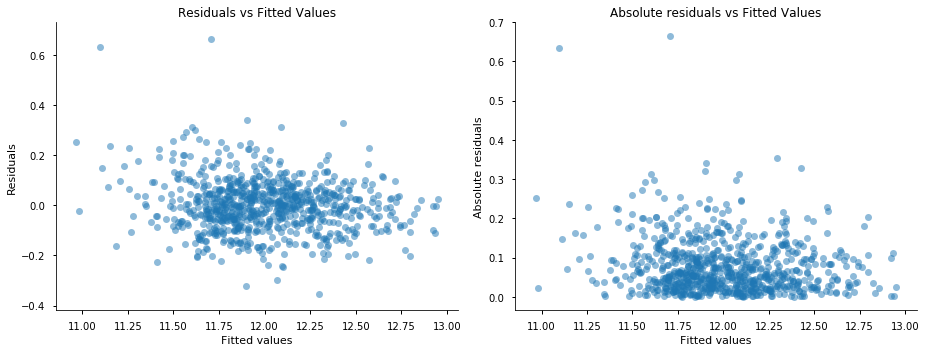

In [79]:
#Residual plots of Elastic net

enet.fit(data_s[predictors2], data_s['LogSalePrice'])
y_fit = enet.predict(data_s[predictors2])
y_actual = data_s['LogSalePrice']
residuals = y_fit-y_actual
abs_residuals = abs(residuals)

fig, ax= plt.subplots(1,2, figsize=(13,5))
sns.regplot(y_fit, residuals, fit_reg=False, ax=ax[0], scatter_kws={'alpha':0.5})
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')
ax[0].set(title='Residuals vs Fitted Values')
sns.regplot(y_fit, abs_residuals, fit_reg=False, ax=ax[1], scatter_kws={'alpha':0.5, 'color': sns.color_palette()[0]})
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Absolute residuals')
ax[1].set(title='Absolute residuals vs Fitted Values')
sns.despine()
plt.tight_layout()
plt.show()
fig.savefig('residuals_enet.png')

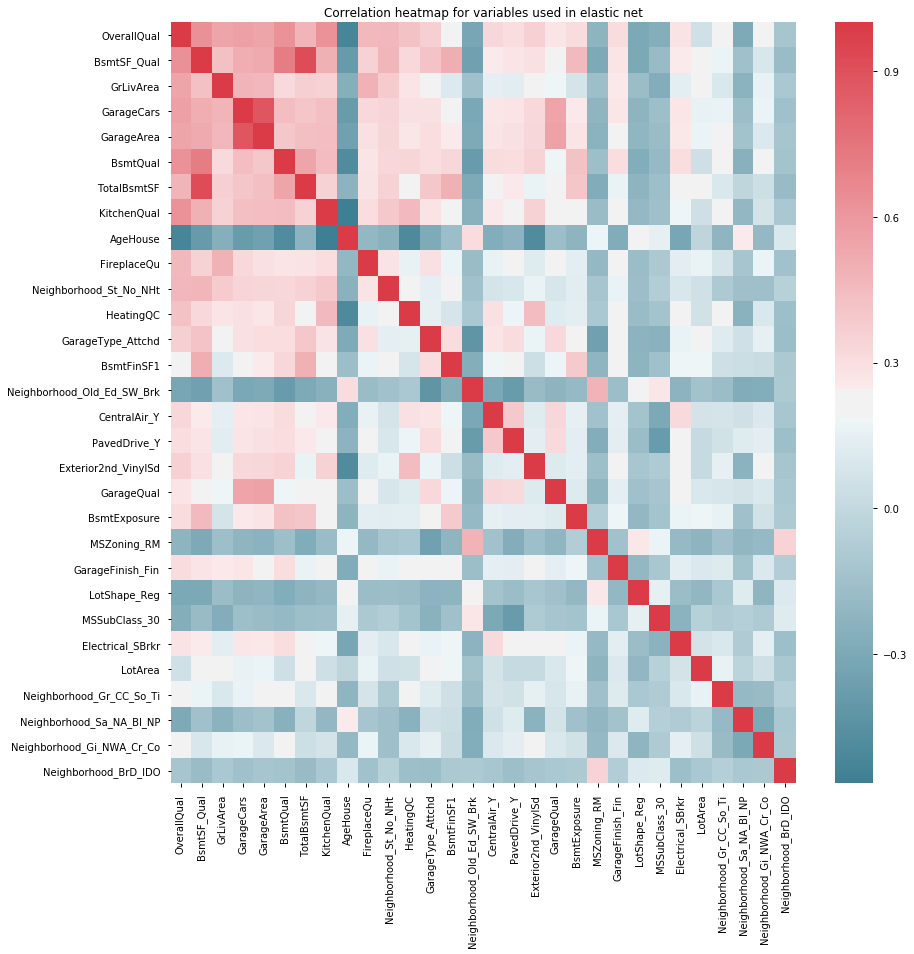

In [80]:
#Heatmap of ENet predictors.

data_num[enet_pred].corr().round(4)
fig, ax = plt.subplots(figsize = (14,14))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(data_num[enet_pred].corr(), ax=ax, cmap=cmap)
ax.set(title='Correlation heatmap for variables used in elastic net')
fig.savefig('Correlation heatmap enet.png')

## PCR with Forward Selection (Submission 22, MAE = 20918.68)

In [81]:
#PCR algorithms used directly from Marcel's QBUS2820 class and edited for MAE.

class PCR:
    def __init__(self, M=1):
        self.M=M

    def fit(self, X, y):
        from sklearn.decomposition import PCA
        from sklearn.linear_model import LinearRegression
        
        self.pca=PCA(n_components=self.M)
        Z= self.pca.fit_transform(X)
        self.pcr = LinearRegression().fit(Z, y)

    def predict(self, X):
        return self.pcr.predict(self.pca.transform(X))

    def cv_score(self, X, y, cv=10):
        from sklearn.model_selection import cross_val_score
        Z=self.pca.transform(X)
        scores = cross_val_score(self.pcr, Z, np.ravel(y), cv=cv, scoring='neg_mean_absolute_error').mean() 
        return -1*np.mean(scores)


def pcrCV(X, y):
    # Approximate cross-validation
    from sklearn.model_selection import cross_val_score
    
    p=X.shape[1]
    bestscore= -np.inf
    cv_scores = []
    for m in range(1,p+1):
        model = PCR(M=m)
        model.fit(X, y)
        Z=model.pca.transform(X)
        score = cross_val_score(model.pcr, Z, y, cv=10, scoring='neg_mean_absolute_error').mean() 
        cv_scores.append(score)
        if score > bestscore:
            bestscore=score
            best=model

    best.cv_scores = pd.Series(cv_scores, index = np.arange(1,p+1))
    return best

In [82]:
#Fit PCR model.
pcr = pcrCV(data_s[predictors_fw],data_s['LogSalePrice'])

In [83]:
#To calculate PCR MAE CV on LogSalePrice.

cv_score_pcr = pcr.cv_score(data_s[predictors_fw], np.ravel(data_s['LogSalePrice']), cv=10)
cv_score_pcr

0.080880017256897113

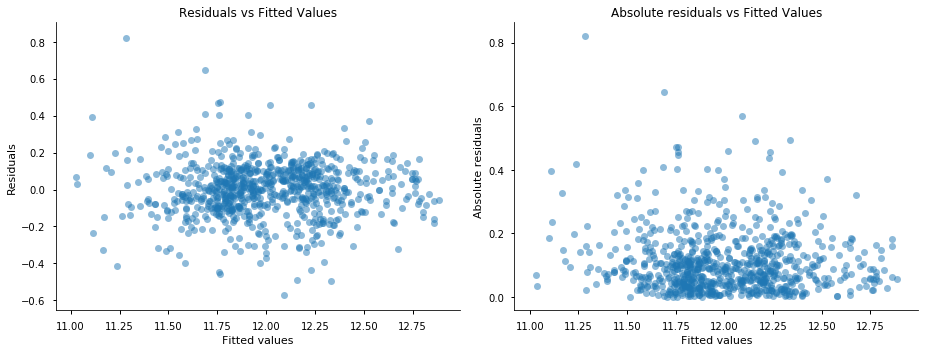

In [84]:
#Residual plot of PCR

pcr.fit(data_s[predictors2], data_s['LogSalePrice'])
y_fit = pcr.predict(data_s[predictors2])
y_actual = data_s['LogSalePrice']
residuals = y_fit-y_actual
abs_residuals = abs(residuals)

fig, ax= plt.subplots(1,2, figsize=(13,5))
sns.regplot(y_fit, residuals, fit_reg=False, ax=ax[0], scatter_kws={'alpha':0.5})
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')
ax[0].set(title='Residuals vs Fitted Values')
sns.regplot(y_fit, abs_residuals, fit_reg=False, ax=ax[1], scatter_kws={'alpha':0.5, 'color': sns.color_palette()[0]})
ax[1].set_xlabel('Fitted values')
ax[1].set_ylabel('Absolute residuals')
ax[1].set(title='Absolute residuals vs Fitted Values')
sns.despine()
plt.tight_layout()
plt.show()
fig.savefig('residuals_pcr.png')

## KNN (Submission 23, MAE = 52483.60)

In [85]:
#Define KNN algorithm and combine with forward selection.

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

def knn_test(X, y):
    
    neighbours=np.arange(1, 40)
    best_score = -np.inf
    
    for k in neighbours: 
        knn = KNeighborsRegressor(n_neighbors = k, metric='mahalanobis', metric_params={'V': X.cov()}) 
        scores = cross_val_score(knn, X, y, cv=10, scoring = 'neg_mean_absolute_error')
        cv_score = np.mean(scores)
        if cv_score >= best_score:
            best_score = cv_score
            best_knn = knn
    
    knn = best_knn
    knn.fit(X, y)
    #predictions = knn.predict(test[predictors])
    #test_rmse = np.sqrt(mean_squared_error(test[response], predictions))
    #cv_rmse= np.sqrt(-best_score)
    cv_mae = -best_score
    print('Chosen K: {}'.format(knn.n_neighbors))
    #return test_rmse, cv_rmse 
    return cv_mae, knn

def select_knn(X, y):
    """Forward variable selection based on the Scikit learn API
    
    
    Output:
    ----------------------------------------------------------------------------------
    Scikit learn knn regression object for the best model
    """

    # Functions
    from sklearn.model_selection import cross_val_score

    # Initialisation
    base = []
    p = X.shape[1]
    candidates = list(np.arange(p))

    # Forward recursion
    i=1
    bestcvscore=-np.inf    
    while i<=p:
        bestscore = 0
        for variable in candidates:
            score,knn = knn_test(X.iloc[:, base + [variable]], y)
            #knn.fit(X.iloc[:, base + [variable]], y)
            #score = knn.score(X.iloc[:, base + [variable]], y)
            if score > bestscore:
                bestscore = score 
                best = knn
                newvariable=variable
        base.append(newvariable)
        candidates.remove(newvariable)
        
        cvscore = cross_val_score(best, X.iloc[:, base], y, scoring='neg_mean_absolute_error').mean() 
        
        if cvscore > bestcvscore:
            bestcvscore=cvscore
            bestcv = best
            subset = base[:]
        i+=1
    bestcv_mae = -bestcvscore
    #Finalise
    return bestcv, bestcv_mae

In [86]:
#Show correlations to have some initial KNN predictors.

pd.set_option('display.max_rows',300)
abs_correl = abs(data_num.corr().round(3)['LogSalePrice'])
abs_correl_sort = abs_correl.sort_values(ascending=False)
abs_correl_sort.head(20)

LogSalePrice        1.000
SalePrice           0.965
OverallQual         0.811
BsmtSF_Qual         0.728
GrLivArea           0.727
GarageCars          0.671
GarageArea_Cars     0.669
GarageArea_Qual     0.669
GarageArea          0.662
ExterQual           0.636
BsmtQual            0.616
TotalBsmtSF         0.616
KitchenQual         0.616
1stFlrSF            0.596
AgeHouse            0.546
FullBath            0.543
FireplaceQu         0.533
Foundation_PConc    0.530
Fireplaces          0.492
TotRmsAbvGrd        0.482
Name: LogSalePrice, dtype: float64

In [90]:
abs_correl_sort.head(20).index

Index(['LogSalePrice', 'SalePrice', 'OverallQual', 'BsmtSF_Qual', 'GrLivArea',
       'GarageCars', 'GarageArea_Cars', 'GarageArea_Qual', 'GarageArea',
       'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'KitchenQual', '1stFlrSF',
       'AgeHouse', 'FullBath', 'FireplaceQu', 'Foundation_PConc', 'Fireplaces',
       'TotRmsAbvGrd'],
      dtype='object')

In [91]:
#Create list of KNN predictors.
#Use the top correlated prodictors
#Keep some intersction terms and processsed terms rather than the original terms, because they contains more information.

predictors_knn = ['OverallQual', 'BsmtSF_Qual','GrLivArea', 'GarageArea_Cars', 'ExterQual', 'AgeHouse']

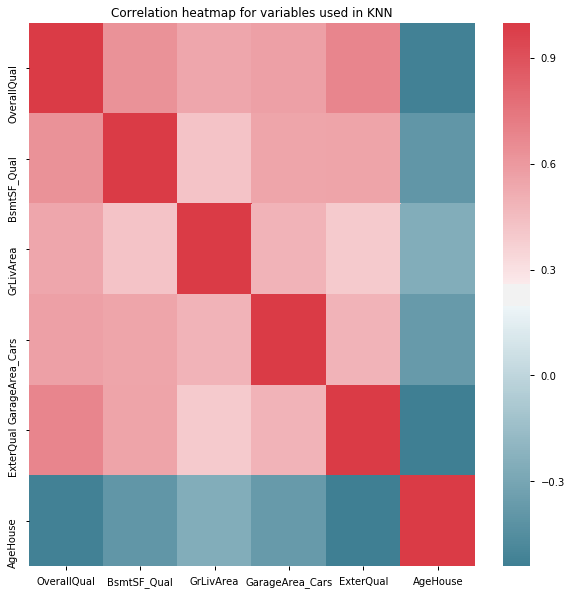

In [92]:
#Correlation heatmap.

data_num[predictors_knn].corr().round(4)
fig, ax = plt.subplots(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(data_num[predictors_knn].corr(), ax=ax, cmap=cmap)
ax.set(title='Correlation heatmap for variables used in KNN')
fig.savefig('correlation_knn.png')

In [93]:
#Create copy to standardize
data_k = data_num.copy()

In [94]:
#Standardize data.

sigma=data_k[predictors_knn].std()
data_k[predictors_knn]=data_k[predictors_knn]/(2*sigma) 

In [91]:
#Run KNN forward selection algorithm and fit model.
#Takes a very long time to run

knn,bestcv_mae = select_knn(data_k[predictors_knn],data_k['LogSalePrice'])
print(knn)
print(bestcv_mae)

Chosen K: 37
Chosen K: 39
Chosen K: 37
Chosen K: 35
Chosen K: 25
Chosen K: 39
Chosen K: 26
Chosen K: 16
Chosen K: 18
Chosen K: 20
Chosen K: 26
Chosen K: 18
Chosen K: 19
Chosen K: 11
Chosen K: 16
Chosen K: 9
Chosen K: 4
Chosen K: 7
Chosen K: 15
Chosen K: 10
Chosen K: 4
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='mahalanobis',
          metric_params={'V':                  AgeHouse  ExterQual  BsmtSF_Qual  GarageArea_Cars  \
AgeHouse         0.250000  -0.135464    -0.098482        -0.092718
ExterQual       -0.135464   0.250000     0.139032         0.122051
BsmtSF_Qual     -0.098482   0.139032     0.250000         0.138337
...76   0.123440
OverallQual         0.250000   0.136405
GrLivArea           0.136405   0.250000  },
          n_jobs=1, n_neighbors=4, p=2, weights='uniform')
0.127881973958


## To Make Predictions

In [95]:
#Import validation set

data_v = pd.read_csv('test.csv')
data_v.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,1,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,4,1910,2006,Hip,CompShg,MetalSd,Stucco,...,4,Maj2,0,NaN,Detchd,1956.0,Unf,1.0,280.0,TA,TA,Y,0,30,226,0,0,0,NaN,NaN,NaN,0,6,2009,WD
1,2,190,RL,90.0,15750,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,2fmCon,1Story,5,5,1953,1953,Hip,CompShg,MetalSd,MetalSd,...,5,Typ,2,Gd,Attchd,1953.0,Unf,1.0,375.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD
2,3,50,RL,65.0,6435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,MetalSd,MetalSd,...,6,Typ,1,Gd,Detchd,1939.0,Unf,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD
3,4,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,6,1980,1988,Gable,CompShg,HdBoard,HdBoard,...,7,Min1,1,TA,Attchd,1980.0,Unf,2.0,489.0,TA,TA,Y,28,73,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD
4,5,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1956,2001,Hip,CompShg,Wd Sdng,VinylSd,...,6,Min1,0,NaN,Attchd,2001.0,Unf,2.0,896.0,TA,TA,Y,75,0,0,323,0,0,NaN,NaN,Shed,400,6,2006,WD


In [96]:
#Do all the same data manipulation/processing changes as with the train data!!

#Convert to string type

data_v['MSSubClass'] = data_v['MSSubClass'].astype(str)
data_v['MoSold'] = data_v['MoSold'].astype(str)

#Fill object type blanks with NA one by one for record purposes

data_v['LotFrontage'] = data_v['LotFrontage'].fillna(0)
data_v['Alley'] = data_v['Alley'].fillna('NA')
data_v['BsmtQual'] = data_v['BsmtQual'].fillna('NA')
data_v['BsmtCond'] = data_v['BsmtCond'].fillna('NA')
data_v['BsmtExposure'] = data_v['BsmtExposure'].fillna('NA')
data_v['BsmtFinType1'] = data_v['BsmtFinType1'].fillna('NA')
data_v['BsmtFinType2'] = data_v['BsmtFinType2'].fillna('NA')
data_v['FireplaceQu'] = data_v['FireplaceQu'].fillna('NA')
data_v['GarageType'] = data_v['GarageType'].fillna('NA')
data_v['GarageFinish'] = data_v['GarageFinish'].fillna('NA')
data_v['GarageQual'] = data_v['GarageQual'].fillna('NA')
data_v['GarageCond'] = data_v['GarageCond'].fillna('NA')
data_v['PoolQC'] = data_v['PoolQC'].fillna('NA')
data_v['Fence'] = data_v['Fence'].fillna('NA')
data_v['MiscFeature'] = data_v['MiscFeature'].fillna('NA')
data_v['MasVnrArea'] = data_v['MasVnrArea'].fillna(0)
data_v['MasVnrType'] = data_v['MasVnrType'].fillna('None')
data_v['BsmtFullBath'] = data_v['BsmtFullBath'].fillna(0)

#Create age house and age garage to use in analysis

data_v['AgeHouse'] = (data_v['YrSold'] - data_v['YearRemod/Add']).astype(float)
data_v['AgeGarage'] = (data_v['YrSold'] - data_v['GarageYrBlt']).astype(float)

#Delete year built, remodeled, and garage year built and fill blank AgeGarage with 0

del data_v['YearBuilt']
del data_v['YearRemod/Add']
del data_v['GarageYrBlt']
data_v['AgeGarage'] = data_v['AgeGarage'].fillna(0)

In [97]:
#Combine Neighborhood variables

neighbor_combined = {'MeadowV':'MeadowV',
                     'BrDale': 'BrD_IDO',
                     'IDOTRR': 'BrD_IDO',
                     'OldTown':'Old_Ed_SW_Brk',
                     'Edwards':'Old_Ed_SW_Brk',
                     'SWISU':'Old_Ed_SW_Brk',
                     'BrkSide':'Old_Ed_SW_Brk',
                     'Sawyer':'Sa_NA_Bl_NP',
                     'NAmes':'Sa_NA_Bl_NP',
                     'Blueste':'Sa_NA_Bl_NP',
                     'NPkVill':'Sa_NA_Bl_NP',
                     'Mitchel':'Mi_SaW,Bng',
                     'SawyerW':'Mi_SaW,Bng',
                     'Blmngtn':'Mi_SaW,Bng',
                     'Gilbert':'Gi_NWA_Cr_Co',
                     'NWAmes':'Gi_NWA_Cr_Co',
                     'Crawfor':'Gi_NWA_Cr_Co',
                     'CollgCr':'Gi_NWA_Cr_Co',
                     'Greens':'Gr_CC_So_Ti',
                     'ClearCr':'Gr_CC_So_Ti',
                     'Somerst':'Gr_CC_So_Ti',
                     'Timber':'Gr_CC_So_Ti',
                     'Veenker':'Veenker',
                     'StoneBr':'St_No_NHt',
                     'NoRidge':'St_No_NHt',
                     'NridgHt':'St_No_NHt'}
data_v['Neighborhood'] = data_v['Neighborhood'].map(neighbor_combined)

In [98]:
#Convert quality ordinals to numerical

exterqual_vals = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
data_v['ExterQual'] = data_v['ExterQual'].map(exterqual_vals).astype(int)

bsmt_vals = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_v['BsmtQual'] = data_v['BsmtQual'].map(bsmt_vals).astype(int)

bsmt_exp = {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}
data_v['BsmtExposure'] = data_v['BsmtExposure'].map(bsmt_exp).astype(int)

kitchen_vals = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_v['KitchenQual'] = data_v['KitchenQual'].map(kitchen_vals).astype(int)

fireplace_qual = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_v['FireplaceQu'] = data_v['FireplaceQu'].map(fireplace_qual).astype(int)

garage_vals= {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_v['GarageQual'] = data_v['GarageQual'].map(garage_vals).astype(int)

heating_vals = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
data_v['HeatingQC'] = data_v['HeatingQC'].map(kitchen_vals).astype(int)

garage_cond = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_v['GarageCond'] = data_v['GarageCond'].map(garage_cond).astype(int)

bsmt_cond = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
data_v['BsmtCond'] = data_v['BsmtCond'].map(bsmt_cond).astype(int)

In [99]:
#Create different lists by data type.

columns_float_v = data_v.select_dtypes(['float64']).columns
columns_int_v = data_v.select_dtypes(['int64']).columns
columns_cat_v = data_v.select_dtypes(['object']).columns

In [100]:
#Create dummy variables as before.

columns_cat_v = list(columns_cat_v)
for column in columns_cat_v:
    data_v = pd.get_dummies(data_v, columns = [column])

In [101]:
#Create interactions as before.

data_v['BsmtSF_Qual'] = data_v['TotalBsmtSF']*data_v['BsmtQual']
data_v['GarageArea_Qual'] = data_v['GarageArea']*data_v['GarageQual']
data_v['GrLiv_Rooms'] = data_v['GrLivArea']*data_v['TotRmsAbvGrd']
data_v['GarageArea_Cars'] = data_v['GarageArea']*data_v['GarageCars']

In [102]:
#Standardize data for KNN.

data_knn = data_v.copy()
sigma=data_num[predictors_knn].std()
data_knn[predictors_knn]=data_knn[predictors_knn]/(2*sigma) 

In [103]:
#Standardize data for all other methods.

pred_float_v = data_v.select_dtypes(['float64']).columns
pred_int_v = data_v.select_dtypes(['int64']).columns
pred_dum_v = data_v.select_dtypes(['uint8']).columns

mu_float = np.mean(data_num[pred_float])
sigma_float = np.std(data_num[pred_float])

mu_int = np.mean(data_num[pred_int])
sigma_int = np.std(data_num[pred_int])

mu_dum = np.mean(data_num[pred_dum])
sigma_dum = np.std(data_num[pred_dum])

data_v[pred_float] = (data_v[pred_float]-mu_float)/(2*sigma_float)
data_v[pred_int] = (data_v[pred_int]-mu_int)/(2*sigma_int)
data_v[pred_dum] = (data_v[pred_dum])/(sigma_dum)

data_v.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_WD,BsmtSF_Qual,GarageArea_Qual,GrLiv_Rooms,GarageArea_Cars
0,1,60.0,-0.181676,-0.375442,4,-0.281024,-0.304895,-0.243117,3,-0.282776,-0.223621,465.0,310.0,0.009754,-0.580017,1022,0,0,-0.472128,1.0,0.0,-0.479465,-0.376436,-0.505721,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.158828,840.0,4088,-0.486480
1,2,90.0,0.381354,-0.375442,5,-0.120486,-0.304895,-0.243117,3,0.198789,0.502414,0.0,324.0,0.193405,-0.580017,1336,0,0,-0.131225,1.0,0.0,-0.479465,-0.376436,-0.505721,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.042517,1125.0,6680,-0.413720
2,3,65.0,-0.232053,0.009664,5,-0.281024,-0.304895,-0.243117,3,-0.282776,-0.525524,0.0,972.0,-0.054460,-0.053510,972,605,0,0.130423,0.0,0.0,-0.479465,-0.376436,0.107764,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.199496,936.0,9462,-0.461971
3,4,80.0,0.029049,0.394770,6,0.521666,-0.304895,0.337016,3,0.198789,-0.525524,0.0,738.0,-0.354980,-0.580017,1277,767,0,0.637434,0.0,0.0,0.457137,0.630340,0.107764,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.189736,1467.0,14308,0.048116
4,5,70.0,0.220018,-0.375442,5,-0.281024,-0.304895,-0.243117,3,-0.282776,0.078283,0.0,521.0,0.000764,-0.053510,1384,0,0,-0.079113,1.0,0.0,-0.479465,-0.376436,-0.505721,1,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.164522,2688.0,8304,0.671556


In [105]:
#Predictions based on OLS model

y_predict_ols = pd.DataFrame(np.exp(ols.predict(data_v[predictors1])))
pd.set_option('display.max_rows', 1608)
y_predict_ols.head()

,0
0,106445.605273
1,146165.276476
2,135298.267147
3,194368.407193
4,162717.285142


In [106]:
#Predictions based on Lasso model

y_predict_lasso = pd.DataFrame(np.exp(lasso.predict(data_v[predictors2])))
pd.set_option('display.max_rows', 1608)
y_predict_lasso.head()

,0
0,100807.895653
1,150250.893383
2,140169.296028
3,198279.109834
4,156867.455017


In [107]:
#Predictions based on Forward + Ridge model

y_predict_ridge = pd.DataFrame(np.exp(ridge_fw.predict(data_v[predictors2])))
pd.set_option('display.max_rows', 1608)
y_predict_ridge.head()

,0
0,99884.664148
1,154228.605440
2,139303.388607
3,195902.314399
4,158471.368112


In [108]:
#Predictions based on ENet model

y_predict_enet = pd.DataFrame(np.exp(enet.predict(data_v[predictors2])))
pd.set_option('display.max_rows', 1615)
y_predict_enet.head()

,0
0,100496.008731
1,151378.241754
2,139666.480073
3,196686.352593
4,156728.874087


In [109]:
#Predictions based on Forward + PCR model

y_predict_pcr = pd.DataFrame(np.exp(pcr.predict(data_v[predictors2])))
pd.set_option('display.max_rows', 1608)
y_predict_pcr.head()

,0
0,94816.411120
1,157945.135071
2,143404.654824
3,199183.622923
4,151889.680870


In [ ]:
#Predictions based on KNN model
#Won't run as knn code written, but not run as it takes multiple hours

y_predict_knn = pd.DataFrame(np.exp(knn.predict(data_knn[predictors_knn])))
pd.set_option('display.max_rows', 1608)
y_predict_knn.head()